In [1]:
import cv2
import numpy as np
from urllib.request import urlopen
from matplotlib import pyplot as plt

In [2]:
def url_to_image(url, readFlag=cv2.IMREAD_COLOR, url_error_exception=True):
    """url_to_image
       Modification of imutils.url_to_image()
       
       download the image, convert it to a NumPy array, and then read it into OpenCV format
    """
    if url_error_exception == True:
        resp = urlopen(url)
    else:
        try:
            resp = urlopen(url)
        except:
            return None
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, readFlag)

    # return the image
    return image

In [3]:
def url_iterator(url_folder_path, file_name, iterable, extension):
    """ function to iterate url
    In this example, the naming format is:
    
        url + file_name + iterable + extension.
        
    For example:
        'https://raw.githubusercontent.com/yasirroni/myData/master/Bengali%20Handwritten%20Digits%20Sample/' + 
        'datasets_26936_76936_training-a_a' + 
        '00000' + 
        '.png'
    """
    for val in iterable:
        yield url_folder_path + file_name + str(val) + extension

In [4]:
def iterable_with_padding(*args, length="min", padding = "0"):
    if len(args) == 1:
        max_val = args[0]
    else:
        max_val = args[1]
        
    if length == "min":
        length = len(str(max_val))
        
    for i in range(*args):
        i = str(i)
        current_length = len(i)
        if length > current_length:
            i = padding * (length - current_length) + str(i)
        yield i 

In [5]:
url_folder_path = "https://raw.githubusercontent.com/yasirroni/myData/master/Bengali%20Handwritten%20Digits%20Sample/"
file_name = "datasets_26936_76936_training-a_a"
last_images_number = 10
iterable = iterable_with_padding(last_images_number, length=5)
extension = ".png"

In [6]:
urls = url_iterator(url_folder_path, file_name, iterable, extension)

In [7]:
imgs = []
for url in urls:
    img = url_to_image(url, url_error_exception=False)
    if img is not None:
        imgs.append(img)
        print(f'Fetch image from {url}')
    else:
        print(f'No image in {url}')

Fetch image from https://raw.githubusercontent.com/yasirroni/myData/master/Bengali%20Handwritten%20Digits%20Sample/datasets_26936_76936_training-a_a00000.png
Fetch image from https://raw.githubusercontent.com/yasirroni/myData/master/Bengali%20Handwritten%20Digits%20Sample/datasets_26936_76936_training-a_a00001.png
Fetch image from https://raw.githubusercontent.com/yasirroni/myData/master/Bengali%20Handwritten%20Digits%20Sample/datasets_26936_76936_training-a_a00002.png
No image in https://raw.githubusercontent.com/yasirroni/myData/master/Bengali%20Handwritten%20Digits%20Sample/datasets_26936_76936_training-a_a00003.png
No image in https://raw.githubusercontent.com/yasirroni/myData/master/Bengali%20Handwritten%20Digits%20Sample/datasets_26936_76936_training-a_a00004.png
No image in https://raw.githubusercontent.com/yasirroni/myData/master/Bengali%20Handwritten%20Digits%20Sample/datasets_26936_76936_training-a_a00005.png
Fetch image from https://raw.githubusercontent.com/yasirroni/myData

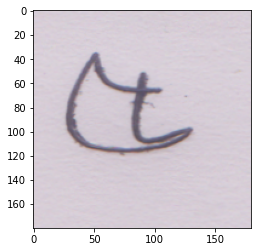

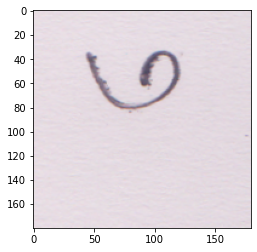

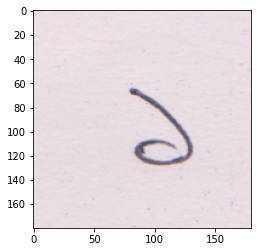

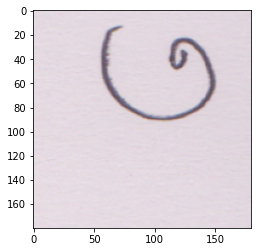

In [8]:
for img in imgs:
    plt.imshow(img)
    plt.show()